In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 17 11:47:47 2022

@author: oiseth
"""
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\OneDrive - NTNU\Dokumenter\NTNU\5. klasse\Masteroppgave\Python code ny\w3tp")
import w3t as w3t
print(w3t.__file__)
import os
import h5py
from matplotlib import pyplot as plt
import time
import pandas as pd
#from scipy import signal as spsp
 #%%

C:\Users\alasm\OneDrive - NTNU\Dokumenter\NTNU\5. klasse\Masteroppgave\Python code ny\w3tp\w3t\__init__.py


In [2]:
section_height = 3.33/100
section_width =  18.3/100
section_length_1 = 2.68
section_length_2 = 2.66

In [15]:
#%% Load all experiments
def load_and_process_static_coeff(h5_input_path, section_name, file_names, filter_order = 6, filter_cutoff_frequency = 2, mode="decks", upwind_in_rig=True):
    """Gather, filter, calculate and plot static coeff for."""
 
    h5_file = os.path.join(h5_input_path, section_name)
    f = h5py.File((h5_file + ".hdf5"), "r")
 
    exp0 = w3t.Experiment.fromWTT(f[file_names[0]])
    exp1 = w3t.Experiment.fromWTT(f[file_names[1]])
 
    exp0.filt_forces(filter_order, filter_cutoff_frequency)
    exp1.filt_forces(filter_order, filter_cutoff_frequency)

    if upwind_in_rig == True:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=True)
    elif upwind_in_rig == False:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=False)
    
    static_coeff.plot_drag_mean(mode=mode)
    static_coeff.plot_lift_mean(mode=mode)
    static_coeff.plot_pitch_mean(mode=mode)

    static_coeff.plot_drag(mode=mode)
    static_coeff.plot_lift(mode=mode)
    static_coeff.plot_pitch(mode=mode)
    
    plt.show()
    return exp0,exp1,static_coeff

tic = time.perf_counter()
plt.close("all")

section_name = "4D_Upstream_Stat"

section_height = 3.33/100
section_width =  18.3/100
section_length_1 = 2.68
section_length_2 = 2.66

#%% Load all experiments
h5_input_file = ".\\\Data_h5\\Static\\" 
h5_file = os.path.join(h5_input_file, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

exp0 = w3t.Experiment.fromWTT(f["HAR_INT_MUS_GAP_45D_02_00_000"])
exp0.plot_experiment()
exp1 = w3t.Experiment.fromWTT(f["HAR_INT_MUS_GAP_45D_02_00_004"])
exp1.plot_experiment()

#%% filter measured forces and plot filtered experiments
filter_order = 6
filter_cutoff_frequency = 2
exp0.filt_forces(filter_order,filter_cutoff_frequency)
exp1.filt_forces(filter_order,filter_cutoff_frequency)
 
exp0.plot_experiment()
exp1.plot_experiment()

#%% obtain static coeff
static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=False)

#%%

static_coeff.plot_drag_mean(mode="decks")
static_coeff.plot_lift_mean(mode="decks")
static_coeff.plot_pitch_mean(mode="decks")

plt.show()


Test


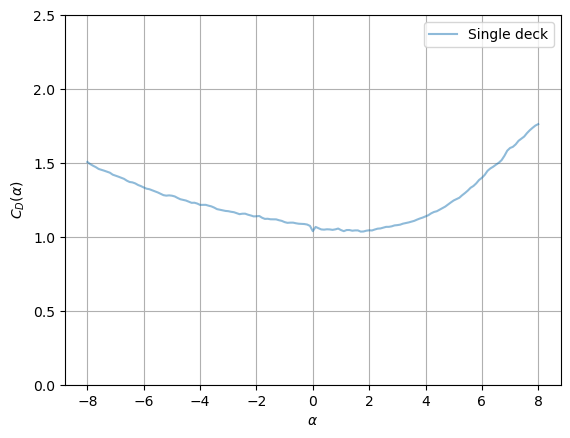

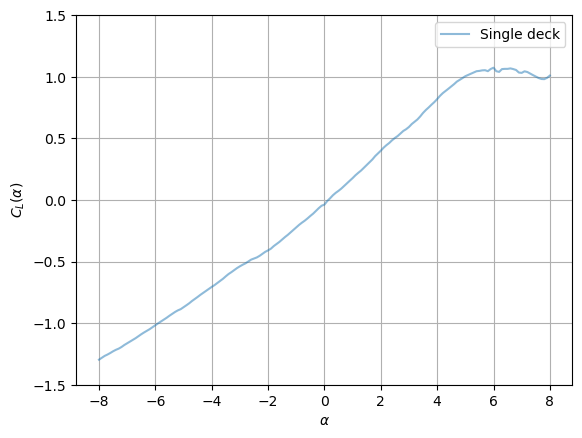

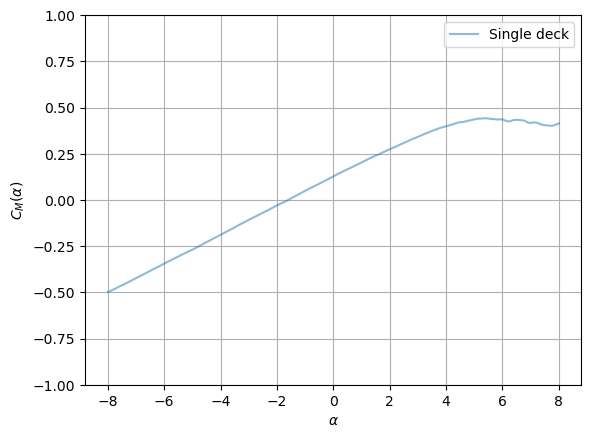

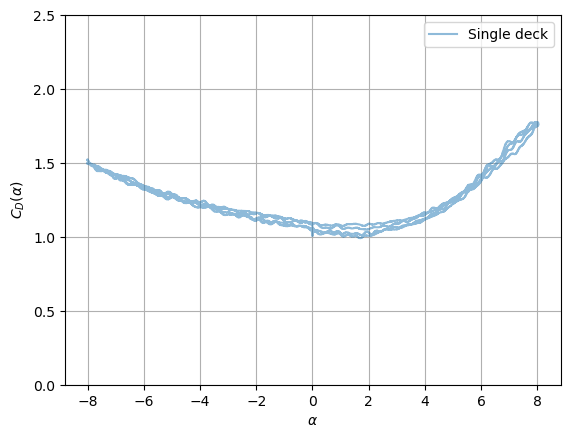

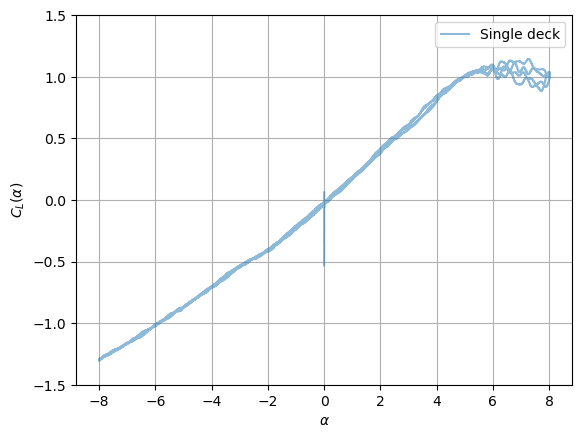

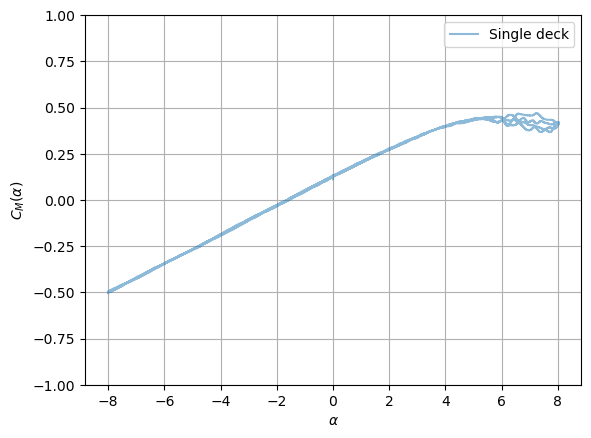

Test


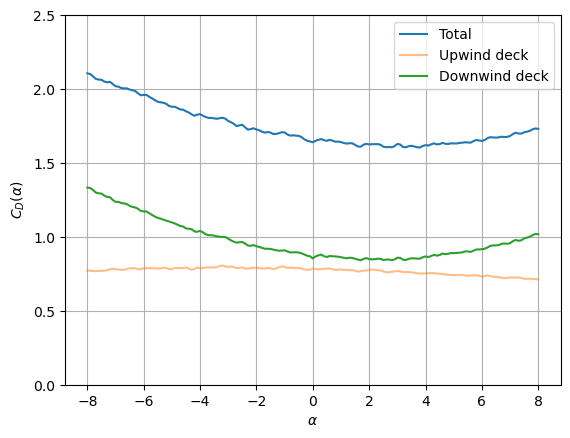

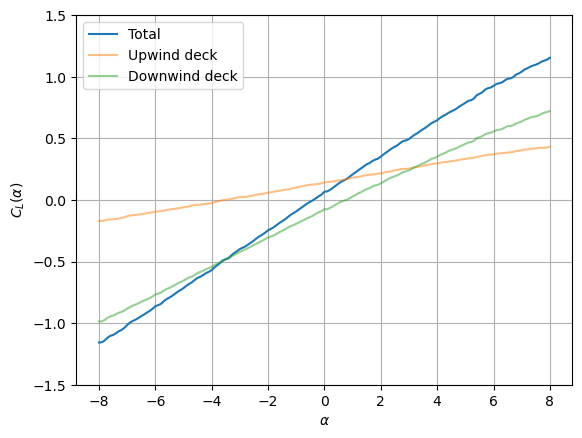

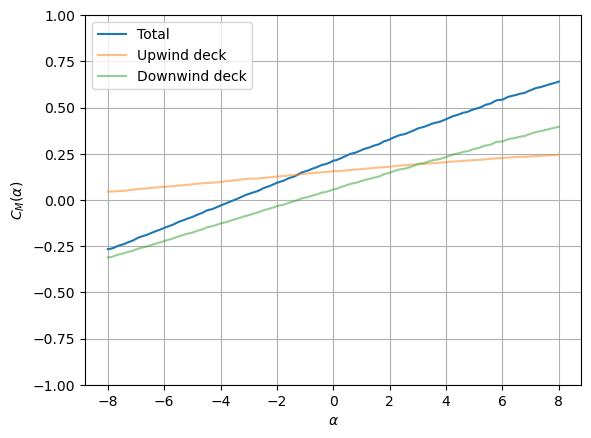

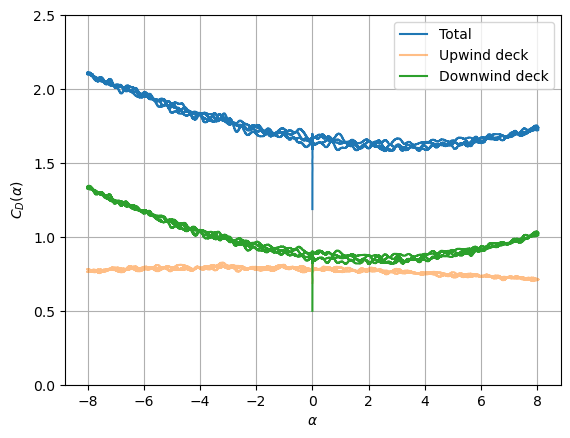

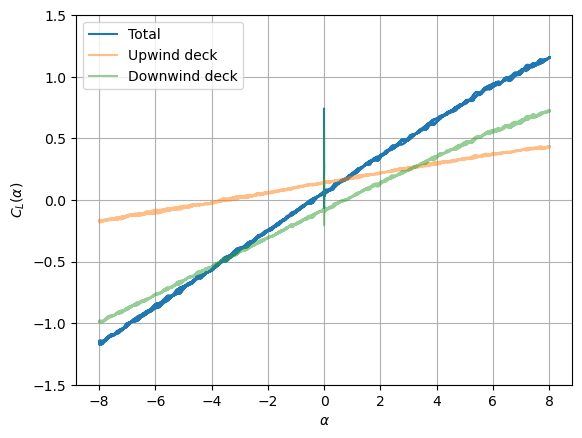

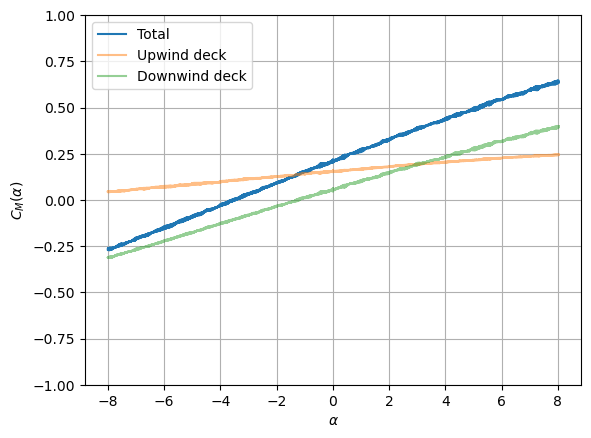

Test


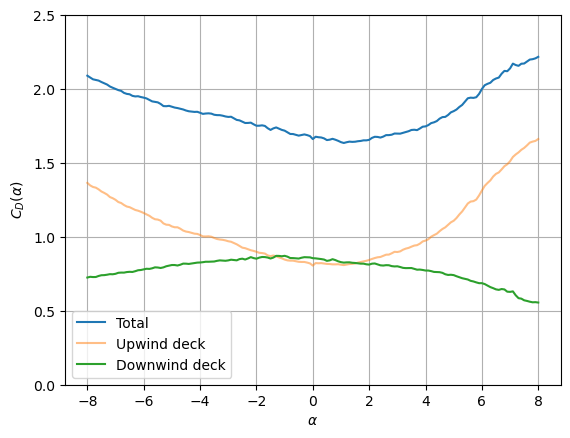

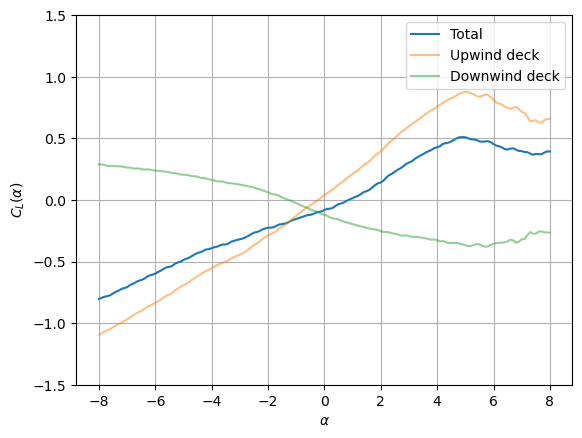

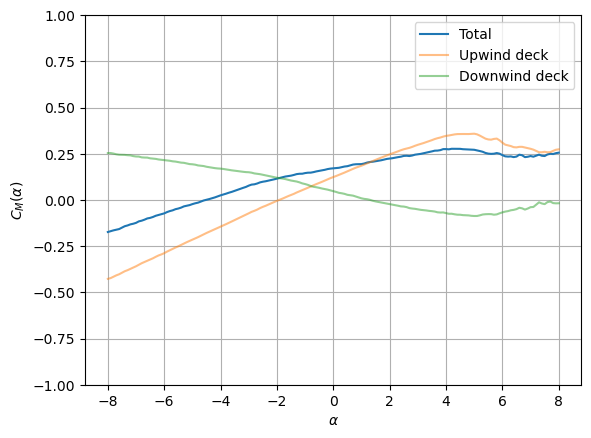

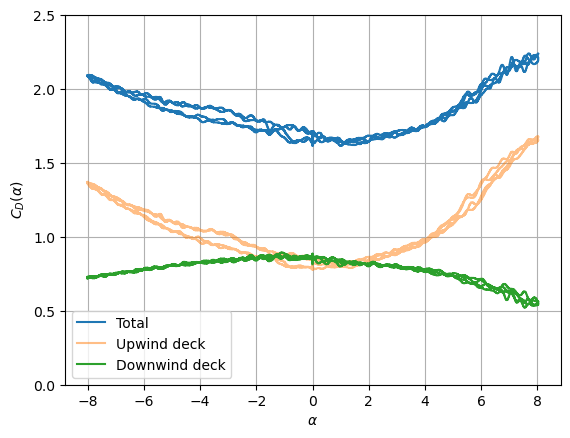

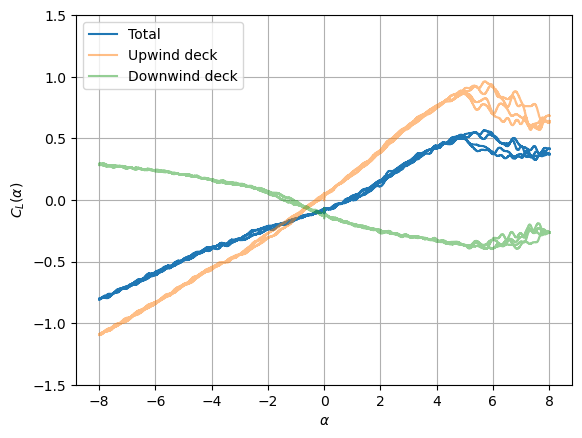

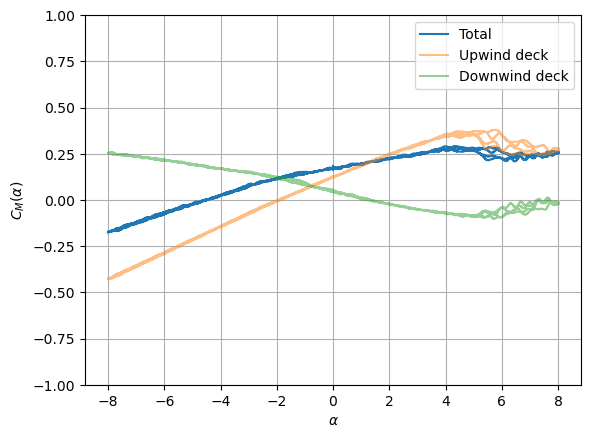

In [16]:
h5_input_path = h5_input_file = ".\\\Data_h5\\Static\\" 

#%% Load single deck
section_name = "Single_Stat"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_005"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "2D_Upstream_Stat"
file_names = ["HAR_INT_MUS_GAP_213D_02_00_001","HAR_INT_MUS_GAP_213D_02_00_002"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "2D_Downstream_Stat"
file_names = ["HAR_INT_MDS_GAP_213D_02_00_000","HAR_INT_MDS_GAP_213D_02_00_001"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()
 

In [5]:
static_coeff_single.save_mean_static_coeff("coefficients.npz", path=".\\\Static_coeff\\", mode="single")

In [6]:
static_coeff_single.print_size()

(31200, 4)
(31200, 4)
(31200, 4)
(31200,)


In [12]:
data = np.load(r".\Static_coeff\coefficients.npz")
print(data.files)

print(data["alpha"].shape)
      
alpha = data["cd_in_rig"]
print(alpha)

['alpha', 'cd_in_rig', 'cl_in_rig', 'cm_in_rig']
(161,)
[1.50666441 1.49249111 1.48149514 1.47176789 1.45951911 1.45369535
 1.44757094 1.44086995 1.43406446 1.42083266 1.41441856 1.40739584
 1.39990084 1.39266253 1.38033609 1.37125714 1.36857648 1.36173767
 1.35098695 1.34350708 1.3343207  1.32615426 1.32252363 1.31517406
 1.30765392 1.30054477 1.29141515 1.28234644 1.27889857 1.28083438
 1.27862879 1.27370632 1.26352117 1.25460164 1.25024114 1.24576715
 1.23809941 1.23035345 1.23099821 1.22539764 1.21637026 1.21641973
 1.21673822 1.21111482 1.20634213 1.19817805 1.18780038 1.18368675
 1.17999126 1.17562357 1.17387378 1.16975705 1.16693444 1.16065715
 1.15366224 1.15676003 1.15696382 1.15003253 1.14491461 1.13856022
 1.13945706 1.14143882 1.12947674 1.12165322 1.12254853 1.11904279
 1.11865354 1.11840402 1.11262885 1.1081918  1.09994035 1.09501993
 1.09634378 1.09635851 1.0921188  1.08899387 1.08821066 1.08691389
 1.08350395 1.07421616 1.03878653 1.06733053 1.05922183 1.05036141
 1.048